# Hypothesis testing

A hypothesis is an assertion or guess about the population parameters which needs to be tested so that it can either be upheld or rejected at a certain level of significance. A hypothesis rejected at some level of significance may be accepted at another level of significance. For e.g, a hypothesis rejected at 0.01(1%) level can be accepted at 5% or 10% level of significance.

The significance level is also used to deduce how confident the statistician is that the hypothesis is true. E.g at a 1% significance level, it means that the statistician is 99% confident of his hypothesis.

Set up a hypothesis based on some observations from your data and then proceed to testing it.

1. After formulating a hypotheis, if the data gives us strong evidence that the hypotheis is wrong, we can reject the hypothesis.

2. But when we have data that is similar to the hypothesis but not exactly the same, we can fail to reject the hypothesis because it is unclear if the hypothesis should be based on the result of the preliminary experiment or any of the slightly different results during testing.


**Null Hypothesis**

This is the hypothesis that there is no difference between things. A possible null hypothesis can be: "`There is no difference in recovery times between Drug C and Drug D.`" Note that, without the null hypothesis, we need preliminary data in order to make a statement that we can test in follow up experiments. In contrast,the null hypothesis does not require preliminary data because the only value that represents no difference is 0.


In order to decide if we reject or fail to reject the null hypothesis, we run the data through something called a statistical test. The output of the statistical test is a decision to reject or fail to reject the null hypothesis.

A statistical test needs three things:

- Data
- Null or primary hypothesis - that is, it needs something to reject or fail to reject
- Alternative hypothesis

**Alternative hypothesis**

When we only have two groups of data, the alternative hypothesis is simply the opposite of the null hypothesis. However, when we have three groups of data, that does not apply. E.g:

$H_0:$ there is no difference in recovery times between drugs C,D and E

Now we have choices for the alternative hypothesis

$H_1:$ Drugs C,D and E are all different from each other 

$H_2:$ Drugs C,D are the same as Drug E is doing its own thing

We now have two alternative hypothesis, and depending on which one we use in the statistical test we can end up making a different decision about the null hypothesis. Therefore, it is important to state which one we want to use. At the end of the day we can say we rejected the null hypothesis in favor of this/that alternative hypothesis.

## Understanding hypothesis testing

**Step 1:** 

Null hypothesis (status quo): $H_0\ \Rightarrow \ \leq, \ \geq, \ = $ (i.e, the null hypothesis can involve any of the relationships highlighted by the signs)

Alternative hypothesis (bold claim): $H_1 \ \Rightarrow \ >, \ <, \ \neq$

**Step 2:**

- Collect a sample of size n
- Compute the mean from this sample $\bar{x}$

**Step 3:** Compute the test staistic:

- If population variance is known, calculate z-score as:

$$z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$

- If population variance is unknown, claulate t-score as:
$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$


**Step 4:** decide a significance level $\alpha$. Lower $\alpha$ means we need a stronger evidence to reject the null hypothesis

Where: $significance \ level = 1 - confidence \ level$

**Step 5.1:** apply decision rule:

`A. If test statistic is z-score`

- 2 tailed z-test:

$$|z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

- Right tailed z-test:

$$z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

- Left tailed z-test:

$$z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

Where $z_\frac{\alpha}{2}$ or $z_\alpha$ are called `critical value`. This critical value is obtained in accordance with the test statistic and is point of demarcation between the acceptance region and the rejection region for the test. This concept also applies to the case where the test statistic is the t-score.

`B. If test statistic is t-score`

- 2 tailed t-test:

$$|t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

- Right tailed z-test:

$$t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

- Left tailed z-test:

$$t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$

**Step 5.2:** compute the p-value $P(Test \ statistic|H_0)$

- 2 tailed test:

$$p \ value = 2 * (1.0 - cdf(test \ statistic)) $$

- One tailed test:

$$p \ values = (1.0 - cdf(test \ statistic))$$


Now, 

$$if(p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject H_0$$



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Question 1

Pista House selling Peanuts claims that each parcel packet on average has 500 grams of sugar (also mentioned on the label of packet). I am skeptic of their claims and believe that on average each packet does not contain 500grams of sugar. How do I prove my claim? (The population std is 50).


**SOLUTION**

**Step 1:**
My hypothesis is as follows:

$H_0 \ (status \ quo):$ Peanut packet does not contain 500grams of sugar

$H_1 \ (bold \ claim):$ Peanut packet contains 500grams of sugar

In [5]:
## Step 2: collecting sample of peanuts from the population of peanuts

sample = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

##computing the mean for this sample

mean = round(np.mean(sample),1)
mean

465.3

In [8]:
##defining the sample and population parameters

sample_size = len(sample)
sample_mean = mean
pop_mean = 500
pop_std = 50

In [9]:
## Step 3: compute the test statistic, z-score since the pop_std is given

#creating a function

def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denominator = pop_std/sample_size**0.5
    return numerator/denominator

z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

-2.1946206961568544


In [12]:
## Step 4: deciding on a significance level
confidence_level = 0.95
alpha = 1-confidence_level
round(alpha, 3)

0.05

In [13]:
## Step 5: conducting a two-tailed test
#two tailed z-score for 95% confidence interval

z_critical = norm.ppf(1-alpha/2)
z_critical

1.959963984540054

Text(465.3, 0.0007, 'x_bar')

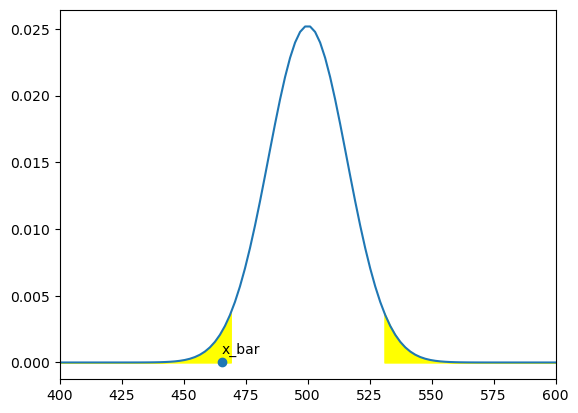

In [21]:
## plotting the sampling distribution with the rejection regions

#defining the min and max values for the x axis
x_min = 400
x_max = 600

#defining the mean and std for the sampling distribution
mean =pop_mean
std = pop_std/sample_size**0.5

#ploting the graph
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x,y)

#computing the left and right critical values (two tailed test)
z_critical_left =  pop_mean + (- z_critical * std)
z_critical_right = pop_mean + (z_critical * std)

#shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='yellow')

#shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='yellow')

#let's see where our sample mean falls
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.0007))

The position of the x_bar shows that it is within the shaded rejection area. 

Following the steps, there are two ways we can either accept or reject the hypothesis - the z-test or the p-value

In [22]:
#conclusion using the z-test

if (np.abs(z) > z_critical):
    print('Reject the null hypothesis')
else:
    print('Fail to the null hypothesis')

Reject the null hypothesis


In [23]:
#conclusion using the p-value

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))
print('p-value =', round(p_value, 4))

if (p_value<alpha):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

p-value = 0.0282
Reject the null hypothesis


Results show that we can be 95% confident that Pista's peanut contains 500grams of sugar.

### Question 2

You have developed a new NLP algorithm and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? Given that the population std is 0.5.


**SOLUTION**

**Step 1:**

$H_0 \ (status \ quo):$ The average rating is not greater than 4

$H_1 \ (bold \ claim):$ The average rating of the algorithm is greater than 4

In [24]:
#sample collection, n=20

sam = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
mean = round(np.mean(sam), 2)
mean

4.25

In [25]:
sample_size = len(sam)
sample_mean = mean
pop_mean = 4
pop_std = 0.5

In [26]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

2.23606797749979


In [28]:
## one tail test

confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


Text(4.25, 0.1, 'x_bar')

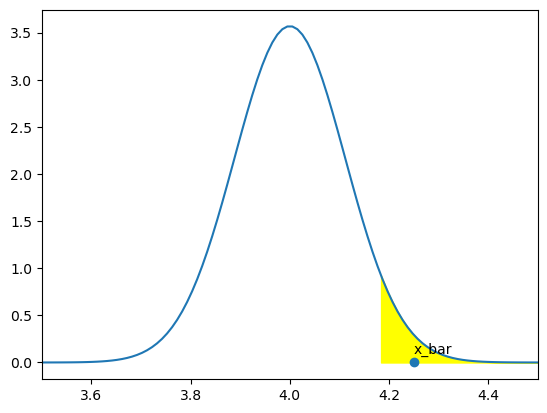

In [29]:
## plotting the sampling distribution with the rejection regions

#defining the min and max values for the x axis
x_min = 3.5
x_max = 4.5

#defining the mean and std for the sampling distribution
mean =pop_mean
std = pop_std/sample_size**0.5

#ploting the graph
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x,y)

#computing the left and right critical values (two tailed test)
z_critical_right = pop_mean + (z_critical * std)

#shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='yellow')


#let's see where our sample mean falls
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.1))

Again, the position of the x_bar is within the shaded rejection area. This shows we can reject the results.

In [30]:
#conclusion using z-test

if (z>z_critical):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

Reject the null hypothesis


In [31]:
#using p-value

p_value = 1.0 - norm.cdf(np.abs(z))
print('p-value =', round(p_value, 4))

if (p_value < alpha):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

p-value = 0.0127
Reject the null hypothesis


### Question 3

TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15km/litre. How do we prove this? The poulation std is given as 1.


**SOLUTION**

**Step 1:**

$H_0 \ (status \ quo):$ The average mileage is not up to 15km/litre or above

$H_1 \ (bold \ claim):$ The new system causes a average mileage of 15km/litre or above

In [32]:
sam = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
mean = round(np.mean(sam), 1)
mean

15.1

In [33]:
sample_size = len(sam)
sample_mean = mean
pop_mean = 15
pop_std = 1

In [34]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

0.4472135954999564


In [35]:
## one tail test

confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


Text(15.1, 0.1, 'x_bar')

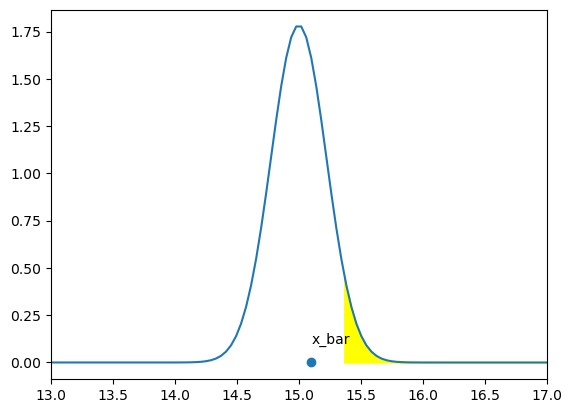

In [36]:
## plotting the sampling distribution with the rejection regions

#defining the min and max values for the x axis
x_min = 13
x_max = 17

#defining the mean and std for the sampling distribution
mean =pop_mean
std = pop_std/sample_size**0.5

#ploting the graph
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x,y)

#computing the right critical values
z_critical_right = pop_mean + (z_critical * std)

#shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='yellow')


#let's see where our sample mean falls
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.1))

The mean falls within the acceptance region, therefore we have to accept the null hypothesis that the mileage is not up to 15km/litre.

In [37]:
#conclusion using z-test

if (z>z_critical):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

Fail to reject the hypothesis


In [38]:
#using p-value

p_value = 1.0 - norm.cdf(np.abs(z))
print('p-value =', round(p_value, 4))

if (p_value < alpha):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

p-value = 0.3274
Fail to reject the hypothesis


### Question 4

You have developed a new machine learning application and claim that on average it takes less than 100ms to predict for any future datapoint. How do you convince your client about this claim? (Based on past data you know that the std is 10ms)


**SOLUTION**

**Step 1:**

$H_0 \ (status \ quo):$ The app does not take <100ms for prediction

$H_1 \ (bold \ claim):$ The ML app takes <100ms for prediction

In [39]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
pop_std = 10

In [40]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

-2.5


In [41]:
## one tail test

confidence_level = 0.99
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

2.3263478740408408


Text(97.5, 0.02, 'x_bar')

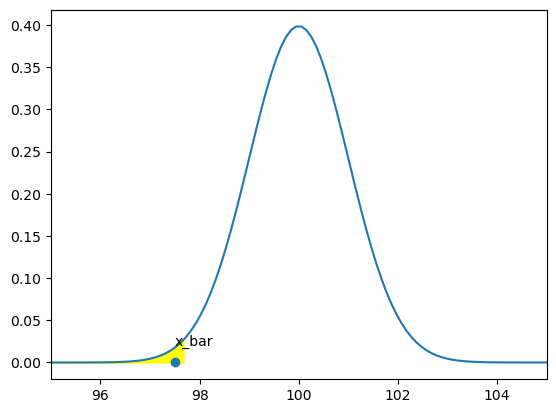

In [43]:
## plotting the sampling distribution with the rejection regions

#defining the min and max values for the x axis
x_min = 95
x_max = 105

#defining the mean and std for the sampling distribution
mean =pop_mean
std = pop_std/sample_size**0.5

#ploting the graph
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x,y)

#computing the left critical values
z_critical_left = pop_mean + (-z_critical * std)

#shading the right rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='yellow')


#let's see where our sample mean falls
plt.scatter(sample_mean, 0)
plt.annotate('x_bar', (sample_mean, 0.02))

The sample mean falls within the rejection region. We can reject the null hypothesis.

In [45]:
#conclusion using z-test

if (z<-z_critical):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

Reject the null hypothesis


In [46]:
#using p-value

p_value = 1.0 - norm.cdf(np.abs(z))
print('p-value =', round(p_value, 4))

if (p_value < alpha):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the hypothesis')

p-value = 0.0062
Reject the null hypothesis


We are 95% confident that our ML app can make predictions in less than 100ms.

While performing a statistical test, it is often done on a sample of data and not in the actual population, therefore, a true hypothesis can be rejected, which leads to error. Some of these cases include:

- Rejection of a null hypothesis when it is true = **Type I error**
- Acceptance of a null hypothesis when it is false = **Type II error** 

Usually, we can combat these errors by increasing the sample size, thereby reducing the probability of committing either of these errors